### Here I'll put different functions to the test

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from time import time

from Basics import Deck, test_shuffle
from win_lose import evaluate_7cards, evaluate_5cards, best_hand
from Game_Board import Test_Game

Testing basic functions and methods

In [2]:
mydeck = Deck()

In [3]:
mydeck.order

['Ace of Clubs',
 '2 of Clubs',
 '3 of Clubs',
 '4 of Clubs',
 '5 of Clubs',
 '6 of Clubs',
 '7 of Clubs',
 '8 of Clubs',
 '9 of Clubs',
 '10 of Clubs',
 'Jack of Clubs',
 'Queen of Clubs',
 'King of Clubs',
 'Ace of Diamonds',
 '2 of Diamonds',
 '3 of Diamonds',
 '4 of Diamonds',
 '5 of Diamonds',
 '6 of Diamonds',
 '7 of Diamonds',
 '8 of Diamonds',
 '9 of Diamonds',
 '10 of Diamonds',
 'Jack of Diamonds',
 'Queen of Diamonds',
 'King of Diamonds',
 'Ace of Hearts',
 '2 of Hearts',
 '3 of Hearts',
 '4 of Hearts',
 '5 of Hearts',
 '6 of Hearts',
 '7 of Hearts',
 '8 of Hearts',
 '9 of Hearts',
 '10 of Hearts',
 'Jack of Hearts',
 'Queen of Hearts',
 'King of Hearts',
 'Ace of Spades',
 '2 of Spades',
 '3 of Spades',
 '4 of Spades',
 '5 of Spades',
 '6 of Spades',
 '7 of Spades',
 '8 of Spades',
 '9 of Spades',
 '10 of Spades',
 'Jack of Spades',
 'Queen of Spades',
 'King of Spades']

In [4]:
df_test_shuffle = test_shuffle(mydeck, 10000)

In [5]:
s_test_summary = df_test_shuffle.mean().sort_values(ascending = False).rename('avg_hand_freq')
s_test_summary

Ace of Diamonds      25.8058
King of Diamonds     25.7265
10 of Clubs          25.7104
3 of Clubs           25.6930
8 of Spades          25.6872
6 of Diamonds        25.6865
Queen of Clubs       25.6793
King of Spades       25.6762
4 of Diamonds        25.6574
4 of Spades          25.6551
5 of Spades          25.6435
8 of Diamonds        25.6402
9 of Diamonds        25.6259
Ace of Hearts        25.6191
Ace of Spades        25.6142
7 of Hearts          25.6039
9 of Hearts          25.5898
2 of Spades          25.5871
Queen of Spades      25.5834
Queen of Hearts      25.5803
9 of Spades          25.5773
9 of Clubs           25.5564
10 of Spades         25.5527
4 of Hearts          25.5426
3 of Diamonds        25.5363
10 of Diamonds       25.5208
Queen of Diamonds    25.5199
2 of Diamonds        25.4934
7 of Diamonds        25.4918
4 of Clubs           25.4778
King of Clubs        25.4756
7 of Clubs           25.4607
3 of Spades          25.4512
10 of Hearts         25.4430
5 of Clubs    

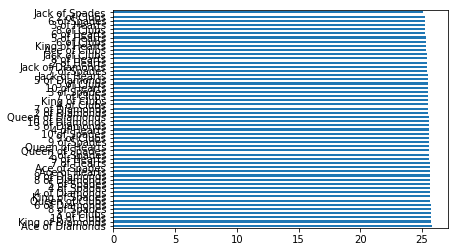

In [6]:
s_test_summary.plot(kind = 'barh')
plt.show()

Seems like the classes and the shuffle functions working okay

I'm going to gather some photos of the deck to make displaying some hands a little easier

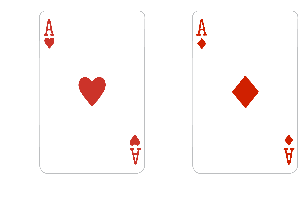

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#make new figure with 2 subfigures
#each subfigure can have an image in it
fig = plt.figure(figsize=(5, 3))
image1 = plt.subplot(121)
image2 = plt.subplot(122)

#read the image files (png files preferred)
img_source1 = mpimg.imread('images/14H.png')
img_source2 = mpimg.imread('images/14D.png')
#put the images into the window
_ = image1.imshow(img_source1)
_ = image2.imshow(img_source2)

#hide axis and show window with images
image1.axis("off")
image2.axis("off")
plt.show()

Trying to run some code a few times to collect some simulation data

In [34]:
print('starting time: {}'.format(time()))
t0 = time()
winning_df = pd.DataFrame()
hands = 10000
for i in range(hands):
    winner_data = []

    participants = 10


    game_info = []
    whole_cards, comm = Test_Game('HOLDEM', participants)

    comm_cards = [card.rank[1] + card.suit[1] for card in comm]

    for player in whole_cards:
        player_cards = [card.rank[1] + card.suit[1] for card in whole_cards[player]]

        game_info.append([player, player_cards, comm_cards])


    game_info_df = pd.DataFrame(game_info, columns = ['player', 'whole', 'comm'])
    game_info_df['combined'] = game_info_df['whole'] + game_info_df['comm']
    game_info_df['mess'] = game_info_df['combined'].apply(evaluate_7cards)
    game_info_df['best hand'] = game_info_df['mess'].apply(lambda x:x[0][0])
    game_info_df['eval'] = game_info_df['mess'].apply(lambda x:x[0][1])
    best = best_hand(list(game_info_df['mess'].apply(lambda x:x[0])))

    winner = game_info_df[game_info_df['eval'] == best[0][1]][['player', 'whole', 'comm', 'best hand', 'eval']]
    winner['round'] = i
    winning_df = winning_df.append(winner)

print('took {} seconds'.format(time() - t0))
print(winning_df.head())
#seems like for every 10 games, it takes ~5 seconds to run the algo
#so 1,000,000 games should take 500,000 seconds = 8333 mins = 138 hrs = 5.7 days to run.

starting time: 1532743800.73822
took 507.15719413757324 seconds
   player      whole                   comm               best hand  \
1       1  [9H, 12S]  [2S, 9C, 9D, 12H, 3C]  (9H, 12S, 9C, 9D, 12H)   
0       0   [6D, 9H]   [2S, 7C, 5C, 9D, 8S]    (6D, 9H, 7C, 5C, 8S)   
2       2  [6C, 14H]   [2S, 7C, 5C, 9D, 8S]    (6C, 7C, 5C, 9D, 8S)   
3       3  [12D, 6S]   [2S, 7C, 5C, 9D, 8S]    (6S, 7C, 5C, 9D, 8S)   
8       8  [13D, 8S]  [3H, 4C, 2S, 13H, 7S]  (13D, 8S, 4C, 13H, 7S)   

                         eval  round  
1       (7, Full House, 9, 0)      0  
0         (5, Straight, 9, 0)      1  
2         (5, Straight, 9, 0)      1  
3         (5, Straight, 9, 0)      1  
8  (2, 1 Pair, 13, [8, 7, 4])      2  


Develop some analysis for the DataFrame
- extract the rank and suit first into two different dataframes
- classify the whole cards into categories:
    - same suit
    - consecutive rank
    - pair
    - 

In [73]:
def sort_me(x):
    x.sort()
    return x

In [105]:
winning_df['whole rank'] = winning_df['whole'].apply(lambda x: [int(i[:-1]) for i in x]).apply(lambda x: sorted(x)).apply(tuple)
winning_df['whole suit'] = winning_df['whole'].apply(lambda x: [i[-1] for i in x]).apply(lambda x: sorted(x)).apply(tuple)

In [106]:
winning_df[['whole rank', 'whole suit', 'whole']].head(10)

,whole rank,whole suit,whole
1,"(9, 12)","(H, S)","[9H, 12S]"
0,"(6, 9)","(D, H)","[6D, 9H]"
2,"(6, 14)","(C, H)","[6C, 14H]"
3,"(6, 12)","(D, S)","[12D, 6S]"
8,"(8, 13)","(D, S)","[13D, 8S]"
5,"(10, 12)","(C, S)","[12S, 10C]"
7,"(4, 7)","(H, H)","[7H, 4H]"
6,"(6, 9)","(H, H)","[9H, 6H]"
9,"(6, 9)","(C, D)","[9C, 6D]"
5,"(12, 14)","(D, H)","[12H, 14D]"


In [121]:
winning_df['whole rank'].value_counts()/10000/10*100

(12, 14)    0.203
(10, 11)    0.196
(8, 10)     0.186
(11, 12)    0.183
(13, 14)    0.181
(9, 10)     0.180
(12, 13)    0.179
(11, 14)    0.173
(10, 13)    0.172
(7, 9)      0.170
(9, 11)     0.167
(11, 13)    0.163
(9, 12)     0.162
(9, 13)     0.159
(5, 14)     0.157
(6, 9)      0.156
(8, 12)     0.156
(7, 10)     0.155
(10, 12)    0.154
(9, 14)     0.153
(7, 14)     0.152
(6, 7)      0.152
(8, 13)     0.150
(10, 14)    0.149
(8, 9)      0.147
(5, 6)      0.146
(7, 8)      0.144
(8, 14)     0.144
(7, 12)     0.143
(4, 11)     0.142
            ...  
(3, 11)     0.116
(4, 8)      0.116
(13, 13)    0.114
(3, 14)     0.114
(4, 9)      0.110
(12, 12)    0.108
(4, 7)      0.106
(3, 7)      0.106
(2, 13)     0.105
(3, 8)      0.105
(3, 10)     0.104
(2, 8)      0.103
(4, 10)     0.100
(14, 14)    0.097
(9, 9)      0.095
(2, 7)      0.092
(3, 9)      0.091
(2, 4)      0.088
(2, 6)      0.087
(2, 3)      0.084
(4, 4)      0.084
(6, 6)      0.084
(2, 10)     0.083
(7, 7)      0.081
(8, 8)    

In [115]:
winning_df['whole suit'].count()

whole suit    11663
dtype: int64